In [1]:
import numpy as np
import pandas as pd
import os 
#for dirname, _, filenames in os.walk('/local/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop,SGD, Adamax

In [36]:
train_dir = "./train_1"
test_dir = "./test_1"

In [37]:
img_size = 48 #original size of the image

In [38]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [39]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 16804 images belonging to 4 classes.
Found 1040 images belonging to 4 classes.


In [40]:
 def build(source=train_dir):
    datagen = ImageDataGenerator(rescale=1. / 255)
    data_generator = train_datagen.flow_from_directory(
    source,  # this is the target directory
    target_size=(150,150),  # all images will be resized to 150x150
    batch_size=64,
    class_mode='sparse')
    class_dictionary = data_generator.class_indices
    return data_generator, class_dictionary
print(build(train_dir))

Found 21005 images belonging to 4 classes.
(<tensorflow.python.keras.preprocessing.image.DirectoryIterator object at 0x000001D98BE8FA48>, {'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3})


In [41]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(po0ol_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(4, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
  

In [42]:
epochs = 70
batch_size = 64

In [43]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

# adjust values to your needs
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 0} )
sess = tf.compat.v1.Session(config=config) 
K.set_session(sess)

In [44]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/70
263/263 [==============================] - 102s 378ms/step - loss: 1.8375 - accuracy: 0.2870 - val_loss: 1.4441 - val_accuracy: 0.3510
Epoch 2/70
263/263 [==============================] - 17s 66ms/step - loss: 1.6348 - accuracy: 0.3143 - val_loss: 1.4539 - val_accuracy: 0.3202
Epoch 3/70
263/263 [==============================] - 17s 66ms/step - loss: 1.5864 - accuracy: 0.3258 - val_loss: 1.4468 - val_accuracy: 0.3269
Epoch 4/70
263/263 [==============================] - 17s 66ms/step - loss: 1.5185 - accuracy: 0.3429 - val_loss: 1.2943 - val_accuracy: 0.3990
Epoch 5/70
263/263 [==============================] - 17s 66ms/step - loss: 1.4869 - accuracy: 0.3543 - val_loss: 1.2761 - val_accuracy: 0.4317
Epoch 6/70
263/263 [==============================] - 17s 66ms/step - loss: 1.4452 - accuracy: 0.3741 - val_loss: 1.2502 - val_accuracy: 0.4317
Epoch 7/70
263/263 [==============================] - 17s 65ms/step - loss: 1.4213 - accuracy: 0.3847 - val_loss: 1.4601 - val_accurac

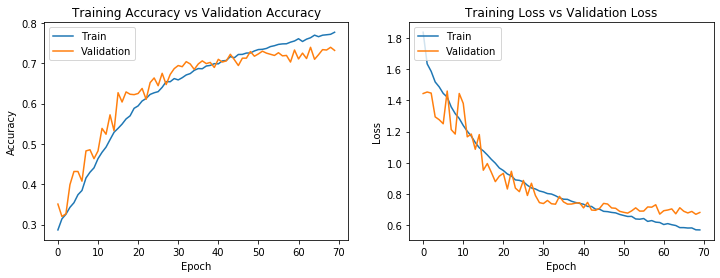

In [45]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_50 (ModuleWra (None, None, None, 32)    320       
_________________________________________________________________
module_wrapper_51 (ModuleWra (None, None, None, 64)    18496     
_________________________________________________________________
module_wrapper_52 (ModuleWra (None, None, None, 64)    256       
_________________________________________________________________
module_wrapper_53 (ModuleWra (None, None, None, 64)    0         
_________________________________________________________________
module_wrapper_54 (ModuleWra (None, None, None, 64)    0         
_________________________________________________________________
module_wrapper_55 (ModuleWra (None, None, None, 128)   204928    
_________________________________________________________________
module_wrapper_56 (ModuleWra (None, None, None, 128)  

In [87]:
model.save('./emo')

INFO:tensorflow:Assets written to: ./emo\assets


INFO:tensorflow:Assets written to: ./emo\assets


(48, 48)


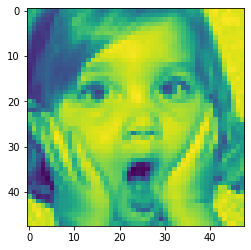

In [78]:
img = image.load_img("./test/surprised/im130.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [79]:
label_dict = {0:'Angry',1:'Happy',2:'Neutral',3:'Sad'}

In [80]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[1.870999e-30, 0.0, 8.2950535e-27, 1.0]


In [81]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Sad


In [88]:
train_data_path = './train_1'
test_data_path = './test_1'
img_rows = 150
img_cols = 150
epochs = 30
batch_size = 32
num_of_train_samples = 3000
num_of_test_samples = 600

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

model.fit_generator(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_test_samples // batch_size)

Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

cf_matrix = confusion_matrix(validation_generator.classes, y_pred)
print(cf_matrix)

Epoch 1/30
 1/93 [..............................] - ETA: 9s - loss: 0.5601 - accuracy: 0.7188

C:\Users\sudhi\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


93/93 [==============================] - ETA: 0s - loss: 0.5502 - accuracy: 0.7799WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 18 batches). You may need to use the repeat() function when building your dataset.


93/93 [==============================] - 6s 68ms/step - loss: 0.5502 - accuracy: 0.7799 - val_loss: 0.7134 - val_accuracy: 0.7231
Epoch 2/30
93/93 [==============================] - 6s 63ms/step - loss: 0.5582 - accuracy: 0.7755
Epoch 3/30
93/93 [==============================] - 6s 63ms/step - loss: 0.5374 - accuracy: 0.7885 0s - loss: 0.5383 - accu
Epoch 4/30
93/93 [==============================] - 6s 62ms/step - loss: 0.5365 - accuracy: 0.7893 0s - loss: 0.538
Epoch 5/30
93/93 [==============================] - 6s 62ms/step - loss: 0.5559 - accuracy: 0.7787
Epoch 6/30
93/93 [==============================] - 6s 62ms/step - loss: 0.5425 - accuracy: 0.7886 0s - loss: 0.5383 - accu
Epoch 7/30
93/93 [==============================] - 6s 63ms/step - loss: 0.5389 - accuracy: 0.7905
Epoch 8/30
93/93 [==============================] - 6s 63ms/step - loss: 0.5513 - accuracy: 0.7781
Epoch 9/30
93/93 [==============================] - 6s 66ms/step - loss: 0.5358 - accuracy: 0.7860
Epoch 10/30

C:\Users\sudhi\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[[ 30  60  56  45]
 [ 61 118  90  85]
 [ 45  81  70  50]
 [ 41  87  72  49]]


In [90]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

17/17 [==============================] - 0s 22ms/step - loss: 0.7143 - accuracy: 0.7365
final train accuracy = 85.43 , validation accuracy = 73.65


In [92]:
model.save_weights("new.h5")

In [19]:
model.save('model/')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets
